In [13]:
import networkx as nx
import math
from aux_functions import *
from generation import generation as gen
import matplotlib.pyplot as plt
import random
import time
import math
from local_search import local_search as ls

dataset_sync_1 = load_dataset('problems/symmetrics/bayg29.tsp')
dataset_sync_2 = load_dataset('problems/symmetrics/berlin52.tsp')
dataset_sync_3 = load_dataset('problems/symmetrics/att48.tsp')
dataset_sync_5 = load_dataset('problems/symmetrics/.tsp')
dataset_sync_4 = load_dataset('problems/symmetrics/ch150.tsp')

dataset = dataset_sync_3

In [14]:

quota = 400

n = len(dataset)

G = nx.complete_graph(n) 

my_pos = { i : ( dataset[i].x, dataset[i].y ) for i in G.nodes }

bonus_label = {}

for i in G.nodes:
    if(i == 0):
        G.nodes[i]['bonus'] = 0
        bonus_label[0] = G.nodes[i]['bonus']
        G.nodes[i]['penalty'] = math.inf
    else:
        bonus = dataset[i].id + 10
        bonus_label[i] = bonus
        G.nodes[i]['bonus'] = bonus
        G.nodes[i]['penalty'] =  500
    G.nodes[i]['id'] = dataset[i].id

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

route = gen.generate_random_route(G, quota)

In [15]:
iterations = 1000
k_itr = 100
k = k_itr

best_route = route
best_cost = route_cost(route, G)


alfa1 = []
alfa2 = []
alfa3 = []
alfa4 = []

grasp_solutions = []


alfas = [0.1, 0.2, 0.3, 0.4]
weights = [1, 1, 1, 1]

count1 = 0

tic = time.perf_counter()

for i in range(iterations):
    # i+=1
    alfa_grasp = random.choices(alfas, weights=weights, k=1)[0]

 
    grasp_counter_start = time.perf_counter()
    route = gen.grasp_construction(G, quota, alfa_grasp)
    grasp_counter_end = time.perf_counter()
    
    if(route in grasp_solutions):
        count1+=1
        continue
    grasp_solutions.append(route)


    ls_counter_start = time.perf_counter()
    # route = ls.drop_step(route, quota, G)

    route = ls.swap_2_opt(route, G, my_pos)
    ls_counter_end = time.perf_counter()

    cost = route_cost(route, G)

    if(alfa_grasp == alfas[0]):
        alfa1.append(cost)
    if(alfa_grasp == alfas[1]):
        alfa2.append(cost)
    if(alfa_grasp == alfas[2]):
        alfa3.append(cost)
    if(alfa_grasp == alfas[3]):
        alfa4.append(cost)


    print(f"GRASP Finished in {grasp_counter_end - grasp_counter_start:0.4f} seconds")
    print(f"LOCAL SEARCH Finished in {ls_counter_end - ls_counter_start:0.4f} seconds")

    if(cost < best_cost):
        best_route = route
        best_cost = cost
        alfa_best = alfa_grasp

    if(i == k):
        # plt.plot(alfas, weights)

        # plt.xlabel('Valores de Alfa')
        # plt.ylabel('Pesos')
        # plt.show()
        alfa1_av = sum(alfa1) / len(alfa1)
        alfa2_av = sum(alfa2) / len(alfa2)
        alfa3_av = sum(alfa3) / len(alfa3)
        alfa4_av = sum(alfa4) / len(alfa4)

        q1 = best_cost/alfa1_av
        q2 = best_cost/alfa2_av
        q3 = best_cost/alfa3_av
        q4 = best_cost/alfa4_av
        q_total = q1+q2+q3+q4
        weights = [q1/q_total, q2/q_total, q3/q_total, q4/q_total]
        k += k_itr 
        
    
    
toc = time.perf_counter()
print(f"Finished in {toc - tic:0.4f} seconds")

print(weights)
# print('alfa_best',alfa_best)


alfa1_av = sum(alfa1) / len(alfa1)
alfa2_av = sum(alfa2) / len(alfa2)
alfa3_av = sum(alfa3) / len(alfa3)
alfa4_av = sum(alfa4) / len(alfa4)

plt.plot(alfas,[alfa1_av, alfa2_av, alfa3_av, alfa4_av])

plt.xlabel('Valores de Alfa')
plt.ylabel('Custos')
plt.show()

plt.figure()
route_edges = [ (best_route[i-1]['id'],best_route[i]['id']) for i in range(len(best_route)) ]
nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

print('best_cost')
print(best_cost)


GRASP Finished in 0.2480 seconds
LOCAL SEARCH Finished in 16.6171 seconds
GRASP Finished in 0.2520 seconds
LOCAL SEARCH Finished in 20.0642 seconds
Finished in 37.1843 seconds
[1, 1, 1, 1]


ZeroDivisionError: division by zero

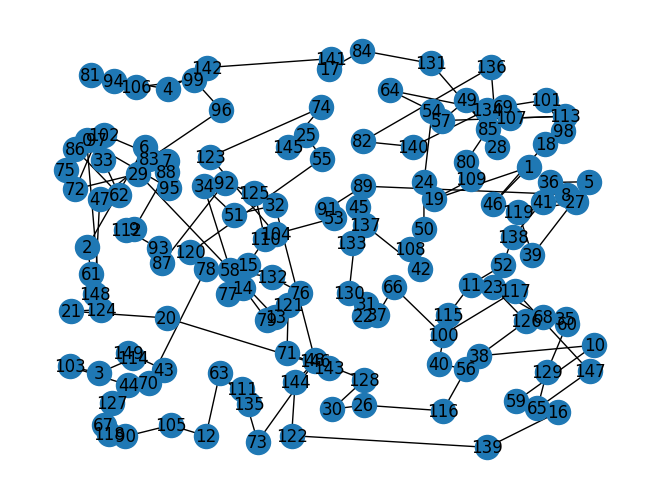

In [8]:

route = gen.genetic_algorithm(G, quota)

plt.figure()
route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]


nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

In [10]:
cost = route_cost(route, G)
bonus = calculate_bonus_colected(route, G)
print('cost', cost)
print('bonus', bonus)

cost 12740.689904831866
bonus 12665


cost 7077.746820728974
bonus 12665


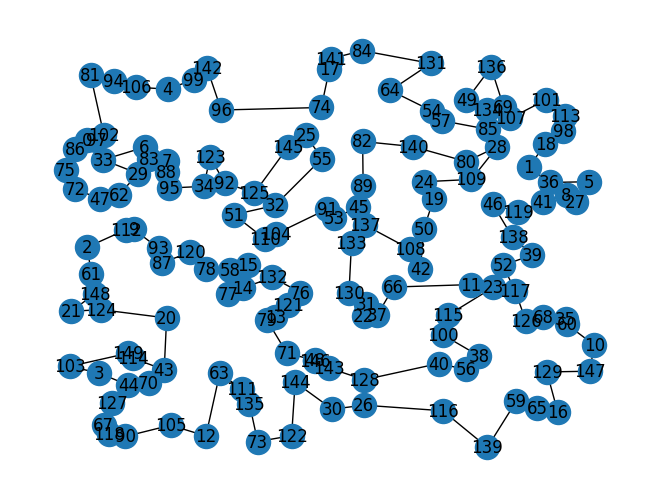

In [11]:
# 2-opt swap
route = ls.swap_2_opt(route, G, my_pos)

route = ls.drop_step(route, quota, G)

plt.figure()
route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]


nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

cost = route_cost(route, G)
bonus = calculate_bonus_colected(route, G)
print('cost', cost)
print('bonus', bonus)